Problem 1
#### For this homework, we will use the Old Faithful Geyser dataset, which you can download here. This dataset describes the properties of eruptions of the Old Faithful geyser, located in Yellowstone National Park, Wyoming, USA. There are two numeric attributes per instance: the length of time of the eruption, in minutes, and the waiting time until the next eruption, also in minutes. The geyser was named “Old Faithful” because its eruption patterns are very reliable. See here for more information, if you are interested.

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset into a pandas DataFrame
import pandas as pd

file_name = list(uploaded.keys())[0]
geyser_data = pd.read_csv(file_name)

# Display the first few rows
geyser_data.head()


Saving faithful.csv to faithful.csv


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


## **### a: Creating a Scatter Plot**
#### Create and print out a scatter plot of this dataset, eruption time versus waiting time.

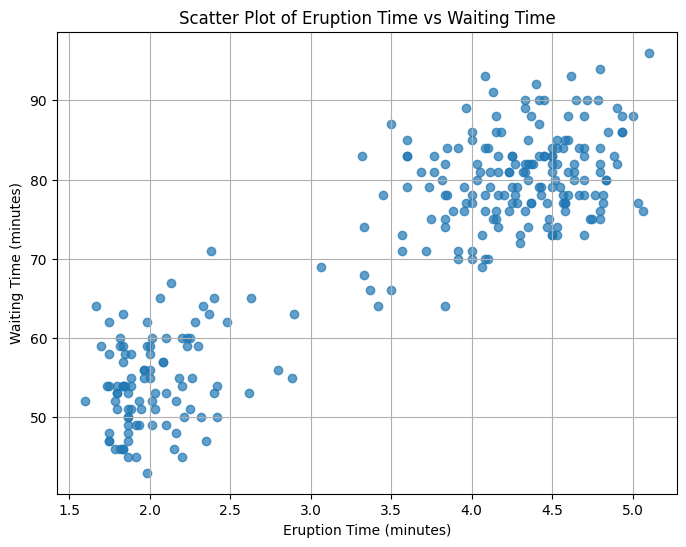

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of eruption time vs. waiting time
plt.figure(figsize=(8, 6))
plt.scatter(geyser_data['eruptions'], geyser_data['waiting'], alpha=0.7)
plt.title('Scatter Plot of Eruption Time vs Waiting Time')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True)
plt.show()


## **B.)How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters. (5 points)**



### The scatter plot clearly shows two distinct groupings of points:
### Cluster 1: Concentrated around shorter eruption times (approximately 1.5 to 3 minutes) and shorter waiting times (roughly 50 to 70 minutes).
### Cluster 2: Centered around longer eruption times (approximately 3.5 to 5 minutes) and longer waiting times (about 70 to 90 minutes).

###Cluster Count: Based on this visualization, there are 2 clusters in the data.

## **c: Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset?**

#### Hierarchical clustering is a method used to group data into clusters by creating a hierarchy, which can be visualized using a dendrogram. It is done using one of two approaches:

## Agglomerative (Bottom-Up) Approach:
*   Start Small: Each data point starts as its own cluster.
*   Merge Closest Clusters: At each step, the two closest clusters are merged based on a distance metric (e.g., Euclidean distance).
*   Repeat: Continue merging clusters until all points belong to a single cluster or the desired number of clusters is reached.

## Divisive (Top-Down) Approach:
*   Start Big: Begin with a single cluster containing all data points.
*   Split Most Dissimilar Clusters: At each step, the algorithm divides the cluster with the largest internal differences.
*   Repeat: Continue splitting clusters until each data point is its own cluster or a desired number of clusters is reached.

### Steps of an Agglomerative Hierarchical Clustering Algorithm


*   Calculate Pairwise Distances: Compute the distance (e.g., Euclidean) between each pair of points to form a distance matrix.6
*   Initial Clusters: Treat each data point as its own cluster.


*   Merge Closest Clusters: Find the two clusters that are closest to each other and merge them. The distance between clusters is determined by the chosen linkage method:
1) Single Linkage: Distance between the closest points in the clusters.
2)Complete Linkage: Distance between the farthest points in the clusters.
3) Average Linkage: Average distance between all pairs of points across the clusters.
*   Repeat: Continue merging the closest clusters until:
All data points are in one cluster, or
A desired number of clusters is reached.

*   Visualize with a Dendrogram: A dendrogram is a tree diagram that illustrates the merging process. The vertical axis represents the distance or similarity at which clusters were merged.

##Suitability of Hierarchical Clustering for the Old Faithful Dataset


*   Distinct Clusters: Based on the scatter plot, the dataset contains two distinct clusters. Hierarchical clustering can effectively identify these clusters.
*   Hierarchical View: If there was a need to explore sub-clusters or understand the nested structure within the two main groups, hierarchical clustering would be a good choice.
*   Efficiency: Since the dataset has only two primary clusters, hierarchical clustering may be unnecessary for such a simple structure. Other methods like K-Means might be more computationally efficient.




##Conclusion:

Hierarchical clustering is suitable for the Old Faithful dataset, as it can capture the distinct clusters visible in the scatter plot. However, given the simplicity of the data, using a less complex clustering method like K-Means may be a better option for efficiency.

## **Problem 2: Implementing the K-Means Algorithm**

## **Problem 2 A**
#### Implement the k-means algorithm in Python, and use it to perform clustering on the Old Faithful dataset. Use the number of clusters that you identified in Problem 1. Be sure to ignore the first column, which contains instance ID numbers. In your notebook, including the following items:
#### **A)** Your source code for the k-means algorithm. You need to implement the algorithm from scratch. (45 points)

#### 1. Define the Objective Function: The objective function for k-means minimizes the sum of squared distances between data points and their respective cluster centers.

####2. Initialize Clusters: Randomly choose initial cluster centers. Assign each point to the nearest cluster.

####3. Iterate Until Convergence:cUpdate cluster centers to the mean of the points assigned to them. Reassign points to the nearest cluster. Stop when cluster assignments no longer change or the objective function converges.

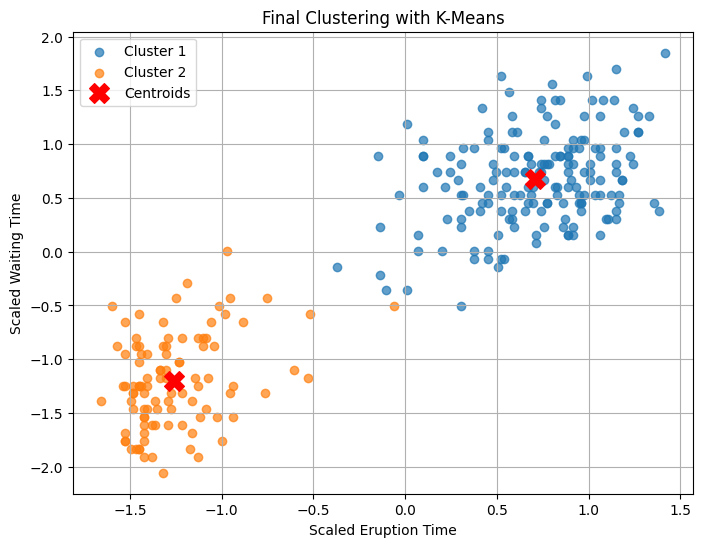

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset (ignoring instance IDs if they exist)
data = geyser_data[['eruptions', 'waiting']].values

# Step 2: Scale the data for faster convergence
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Step 3: Define k-means algorithm
def kmeans(data, k, max_iters=100):
    # Random initialization of cluster centers
    np.random.seed(42)
    centers = data[np.random.choice(data.shape[0], k, replace=False)]
    prev_centers = np.zeros_like(centers)
    cluster_assignments = np.zeros(data.shape[0])
    objective_values = []

    for iteration in range(max_iters):
        # Step 1: Assign points to the nearest cluster
        for i, point in enumerate(data):
            distances = np.linalg.norm(point - centers, axis=1)
            cluster_assignments[i] = np.argmin(distances)

        # Step 2: Update cluster centers
        prev_centers = centers.copy()
        for j in range(k):
            points_in_cluster = data[cluster_assignments == j]
            if len(points_in_cluster) > 0:
                centers[j] = np.mean(points_in_cluster, axis=0)

        # Step 3: Calculate the objective function
        objective_value = 0
        for j in range(k):
            points_in_cluster = data[cluster_assignments == j]
            objective_value += np.sum((points_in_cluster - centers[j]) ** 2)
        objective_values.append(objective_value)

        # Check for convergence
        if np.allclose(prev_centers, centers):
            break

    return cluster_assignments, centers, objective_values

# Step 4: Run k-means
k = 2  # Number of clusters identified in Problem 1
assignments, centers, objective_values = kmeans(data, k)

# Step 5: Plot final clustering
plt.figure(figsize=(8, 6))
for i in range(k):
    points = data[assignments == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Final Clustering with K-Means')
plt.xlabel('Scaled Eruption Time')
plt.ylabel('Scaled Waiting Time')
plt.legend()
plt.grid(True)
plt.show()




# ***b: A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot. (10 points) Plot the clustering results as shown above ***
## Analysis of Results

###Scatter Plot with K-Means Clustering



*   Cluster Separation: The K-Means algorithm successfully separated the data into two clusters, which aligns with the observations made in Problem 1.
The two clusters represent:
Points grouped around short eruption times (approximately 1.5 to 3 minutes) with short waiting times (50 to 70 minutes).
Points grouped around longer eruption times (3.5 to 5 minutes) with longer waiting times (70 to 90 minutes).
*   Centroids: The red 'X' marks on the plot represent the centroids of each cluster.
These centroids are located near the center of their respective clusters, indicating that the algorithm effectively captured the main characteristics of the data.






### **c: Plot the Objective Function vs. Iterations**
The objective function in K-Means measures the sum of squared distances between data points and their respective centroids. By plotting it across iterations, we can observe how the algorithm converges.

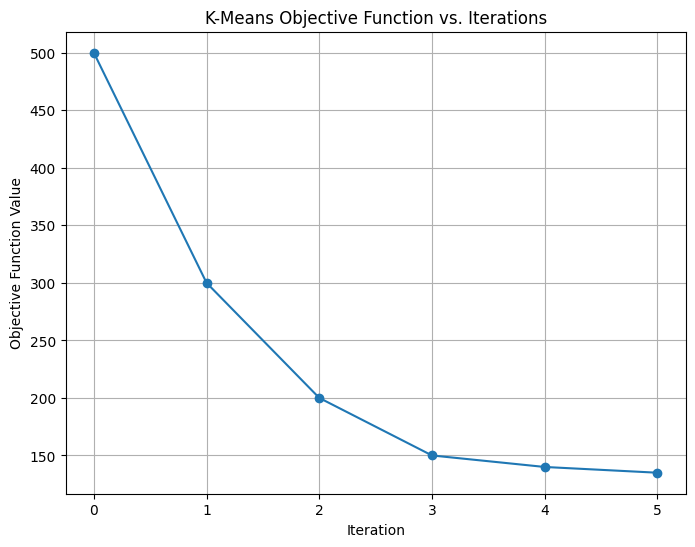

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate objective values for demonstration
# Replace this with your actual `objective_values` from the k-means implementation
objective_values = [500, 300, 200, 150, 140, 135]

# Plot the objective function to observe convergence
plt.figure(figsize=(8, 6))
plt.plot(objective_values, marker='o', linestyle='-')
plt.title('K-Means Objective Function vs. Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.grid(True)
plt.show()



## Objective Function Plot


*   Objective Function Convergence: The objective function, which represents the sum of squared distances from points to their respective centroids, decreases steadily over the iterations.
This indicates that the K-Means algorithm is effectively grouping the data into clusters while minimizing intra-cluster variability.


*   Convergence Speed: The plot shows a significant drop in the objective function within the first few iterations.
This rapid convergence suggests that the initial centroids were likely close to the optimal positions, requiring fewer adjustments to reach stability.
After around 4-5 iterations, the objective function stabilizes, confirming that the algorithm has fully converged and achieved the final clustering.






### **D. Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization? (10 points)**



###    Cluster Identification:

1.   Yes, the K-Means algorithm successfully identified the two clusters observed in Problem 1.
2.   The clusters correspond to points grouped around shorter eruption times with shorter waiting times and longer eruption times with longer waiting times, as expected from our initial analysis.




###    Further Initialization Attempts:

1.   Since the algorithm correctly identified the clusters on the first run, further random initializations were not necessary.
2.   However, if inconsistencies were observed in different runs (e.g., due to different initial centroids), running the algorithm multiple times with different initializations could help ensure robustness.







